1. What is Ensemble Learning in machine learning? Explain the key idea behind it.
        ->Ensemble learning is a machine learning technique where multiple models (often called "weak learners") are trained to solve the same problem, and their predictions are combined in some way to produce a final prediction. The key idea behind ensemble learning is that by combining the predictions of multiple models, you can often achieve better performance than any single model could achieve on its own. This is because different models may capture different aspects of the data, and by combining their insights, you can create a more robust and accurate model.

2. What is the difference between Bagging and Boosting?
-> Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning techniques that combine the predictions of multiple models to improve performance, but they differ in how they build and combine these models:

**Bagging:**
- **Independent Training:** Models are trained in parallel and independently of each other on different bootstrap samples (random subsets with replacement) of the training data.
- **Prediction Combination:** Predictions are typically combined by averaging (for regression) or voting (for classification).
- **Variance Reduction:** Primarily aims to reduce variance by averaging out the errors of individual models.

**Boosting:**
- **Sequential Training:** Models are trained sequentially, with each new model focusing on correcting the errors made by the previous models.
- **Weighted Data:** Data points that were misclassified or poorly predicted by previous models are given higher weights in subsequent training iterations.
- **Bias Reduction:** Primarily aims to reduce bias by iteratively improving the model's performance on difficult instances.

3. What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?
-> **Bootstrap Sampling:** Bootstrap sampling is a resampling technique where a smaller dataset is created by randomly sampling data points from the original dataset with replacement. This means that the same data point can be selected multiple times in a single bootstrap sample. Each bootstrap sample has the same number of data points as the original dataset, but due to sampling with replacement, some data points may be repeated while others are left out.

**Role in Bagging (like Random Forest):** Bootstrap sampling is fundamental to Bagging methods like Random Forest. Here's how it plays a role:

- **Creating Diverse Subsets:** In Bagging, multiple models (e.g., decision trees in Random Forest) are trained independently. Bootstrap sampling is used to create a unique training subset for each model. By sampling with replacement, these subsets are diverse and not identical to the original dataset or each other. This diversity is crucial because it ensures that each model is trained on a slightly different view of the data.

- **Reducing Variance:** Training models on diverse bootstrap samples helps to reduce the variance of the overall ensemble. Each model will likely make different errors on different data points. By averaging or voting on the predictions of these diverse models, the individual errors tend to cancel out, resulting in a more robust and less prone to overfitting model compared to a single model trained on the entire dataset.

- **Random Forest Specifics:** In Random Forest, in addition to bootstrap sampling of data points, there's also random sampling of features at each split of a decision tree. This further increases the diversity among the trees in the forest, leading to a more powerful ensemble.

4. What are Out-of-Bag (OOB) samples and how is OOB score used to evaluate ensemble models?
-> **Out-of-Bag (OOB) Samples:** In Bagging methods like Random Forest, each individual model (e.g., a decision tree) is trained on a bootstrap sample of the original training data. Since bootstrap sampling is done with replacement, some data points from the original dataset will not be included in a particular bootstrap sample. These data points that are *not* used to train a specific model are called Out-of-Bag (OOB) samples for that model. On average, about one-third of the original data points will be OOB for any given bootstrap sample.

**How OOB Score is Used to Evaluate Ensemble Models:** OOB samples provide a convenient way to evaluate the performance of an ensemble model without the need for a separate validation set. Here's how it works:

- **Prediction on OOB Samples:** For each data point in the original dataset, we can identify the models in the ensemble for which this data point was an OOB sample. We then use these specific models to make a prediction on this data point.
- **Aggregating OOB Predictions:** For a given data point, we will have predictions from multiple models (those for which it was an OOB sample). These predictions are then aggregated (e.g., by averaging for regression or voting for classification) to get an OOB prediction for that data point.
- **Calculating OOB Score:** Once we have OOB predictions for all data points in the original dataset, we can compare these predictions to the actual target values and calculate a performance metric (e.g., accuracy for classification, mean squared error for regression). This metric is known as the OOB score.

**Benefits of Using OOB Score:**

- **Efficient Evaluation:** OOB evaluation is efficient because it uses the training data itself to estimate the model's performance, eliminating the need to split the data into separate training and validation sets. This means you can use all your data for training.
- ** unbiased Estimate:** The OOB score provides an unbiased estimate of the ensemble's generalization performance because the predictions for each data point are made by models that have not seen that specific data point during training.
- **Hyperparameter Tuning:** The OOB score can be used to tune the hyperparameters of the ensemble model (e.g., the number of trees in a Random Forest) by selecting the hyperparameter values that result in the best OOB score.

In summary, OOB samples are the data points left out during the bootstrap sampling for a given model, and the OOB score is a performance metric calculated by using these OOB samples to make predictions and comparing them to the actual values. It's a valuable tool for evaluating and tuning Bagging-based ensemble models.

5. Compare feature importance analysis in a single Decision Tree vs. a Random Forest.


Comparing feature importance analysis in a single Decision Tree vs. a Random Forest:

**Single Decision Tree:**

*   **How it's calculated:** Feature importance in a single decision tree is typically calculated based on how much each feature reduces impurity (e.g., Gini impurity or entropy) across all splits where the feature is used. The more a feature reduces impurity, the higher its importance.
*   **Interpretation:** The importance scores directly reflect the splits made by that specific tree. A feature with high importance is one that was frequently used for splitting and resulted in significant impurity reduction within that tree.
*   **Limitations:** Feature importance in a single tree can be unstable. Small changes in the data can lead to different splits and thus different importance scores. Also, if there are correlated features, the importance might be assigned to only one of them, even if others are equally or more relevant.

**Random Forest:**

*   **How it's calculated:** Feature importance in a Random Forest is an aggregate of the importance scores from all the individual decision trees in the forest. The most common method is to average the impurity reduction contributions of each feature across all trees. Another method is permutation importance, where the performance drop is measured when a feature's values are randomly permuted.
*   **Interpretation:** The importance scores in a Random Forest provide a more robust and reliable measure of a feature's overall contribution to the model's predictive power across multiple diverse trees. A feature with high importance is consistently useful for making predictions across the different subsets of data and features used by the individual trees.
*   **Advantages:** Random Forest feature importance is generally more stable and less sensitive to small data variations than single-tree importance. It also helps in understanding the collective impact of features in a more complex ensemble model. It can handle correlated features better than a single tree by distributing importance across them.
*   **Considerations:** While more robust, interpreting feature importance in a Random Forest still requires caution. High importance doesn't necessarily imply causality, and the interaction effects between features are not directly captured by the importance scores.

In summary, while both methods provide insights into which features are most influential, Random Forest feature importance offers a more stable and generalized view of feature relevance by aggregating information across multiple trees, making it a more reliable metric for understanding the overall importance of features in the ensemble.

Top 5 most important features:
             Feature  Importance
          worst area    0.139357
worst concave points    0.132225
 mean concave points    0.107046
        worst radius    0.082848
     worst perimeter    0.080850


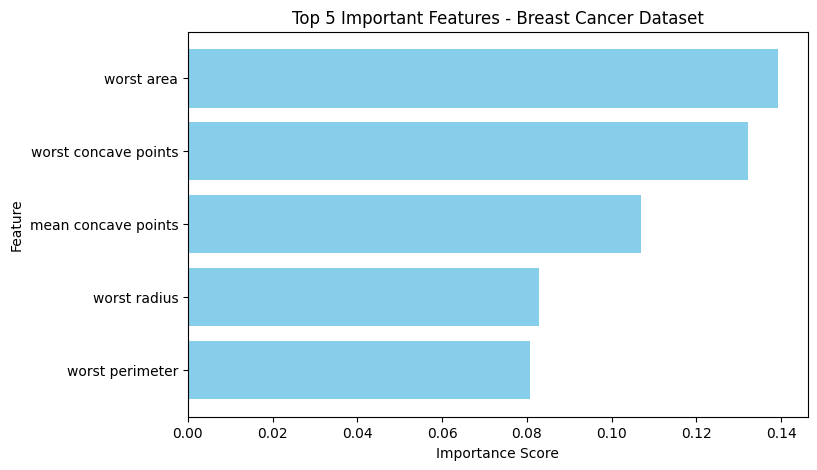

In [2]:
# Write a Python program to:
#● Load the Breast Cancer dataset using sklearn.datasets.load_breast_cancer()
#● Train a Random Forest Classifier
#● Print the top 5 most important features based on feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

importances = clf.feature_importances_

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

top5 = feat_imp_df.sort_values(by="Importance", ascending=False).head(5)

print("Top 5 most important features:")
print(top5.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.barh(top5["Feature"], top5["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 5 Important Features - Breast Cancer Dataset")
plt.gca().invert_yaxis()
plt.show()


Decision Tree Accuracy: 0.9333
Bagging Classifier Accuracy: 0.9333


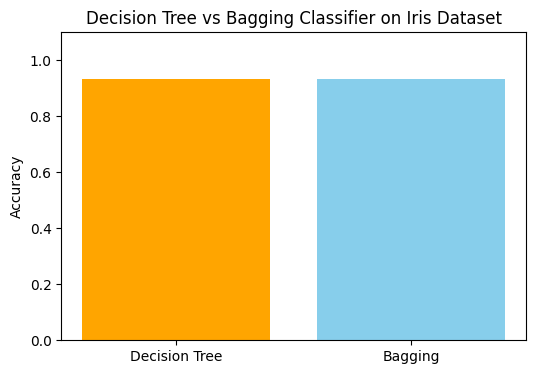

In [4]:
# Write a Python program to:
#● Train a Bagging Classifier using Decision Trees on the Iris dataset
#● Evaluate its accuracy and compare with a single Decision Tree

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Bagging Classifier Accuracy: {bag_acc:.4f}")

plt.figure(figsize=(6,4))
plt.bar(["Decision Tree", "Bagging"], [dt_acc, bag_acc], color=["orange", "skyblue"])
plt.ylabel("Accuracy")
plt.title("Decision Tree vs Bagging Classifier on Iris Dataset")
plt.ylim(0, 1.1)
plt.show()

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Final Accuracy on Test Data: 0.9357


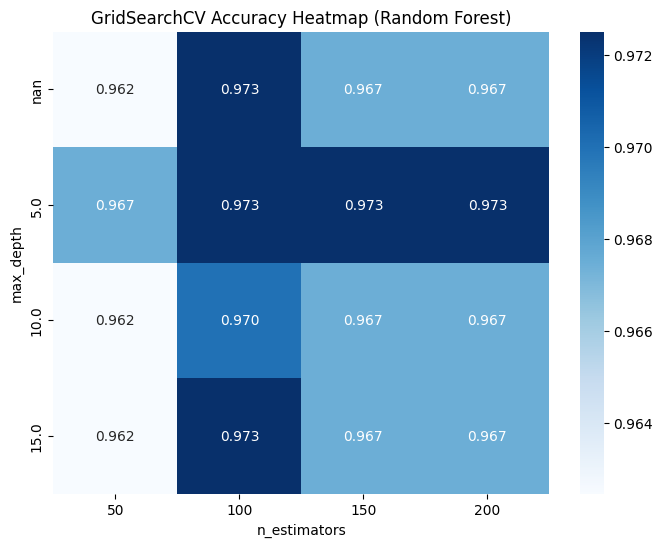

In [6]:
# Write a Python program to:
#● Train a Random Forest Classifier
#● Tune hyperparameters max_depth and n_estimators using GridSearchCV
#● Print the best parameters and final accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [None, 5, 10, 15]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Final Accuracy on Test Data:", round(final_acc, 4))

results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot(
    index="param_max_depth",
    columns="param_n_estimators",
    values="mean_test_score"
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".3f")
plt.title("GridSearchCV Accuracy Heatmap (Random Forest)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()


Bagging Regressor MSE: 0.2579
Random Forest Regressor MSE: 0.2565


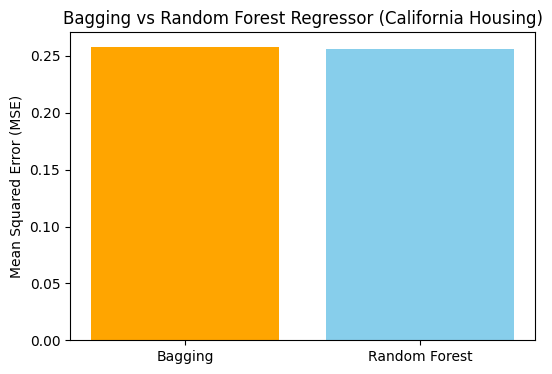

In [10]:
# Write a Python program to:
#● Train a Bagging Regressor and a Random Forest Regressor on the California Housing dataset
#● Compare their Mean Squared Errors (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
bag_mse = mean_squared_error(y_test, y_pred_bag)

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Bagging Regressor MSE: {bag_mse:.4f}")
print(f"Random Forest Regressor MSE: {rf_mse:.4f}")

plt.figure(figsize=(6,4))
plt.bar(["Bagging", "Random Forest"], [bag_mse, rf_mse], color=["orange", "skyblue"])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging vs Random Forest Regressor (California Housing)")
plt.show()

Random Forest AUC: 0.8358
AdaBoost AUC: 0.5391

Cross-Validation Results:
Random Forest CV AUC: 0.9635
AdaBoost CV AUC: 0.8757


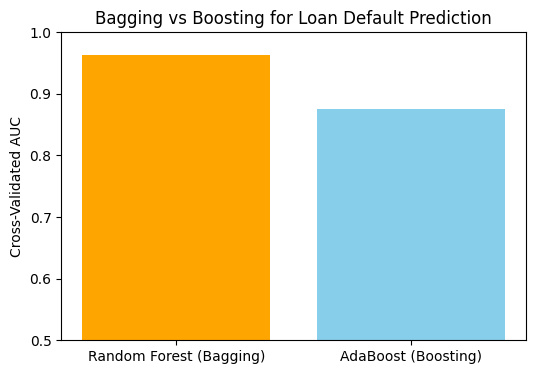

In [12]:
# You are working as a data scientist at a financial institution to predict loan default. You have access to customer demographic and transaction history data.

# You decide to use ensemble techniques to increase model performance.

# Explain your step-by-step approach to:
#● Choose between Bagging or Boosting
#● Handle overfitting
#● Select base models
#● Evaluate performance using cross-validation
#● Justify how ensemble learning improves decision-making in this real-world context.

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=10, n_redundant=5,
    weights=[0.85, 0.15], random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_pred)

ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_auc = roc_auc_score(y_test, ada_pred)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf, X, y, cv=cv, scoring="roc_auc")
ada_cv_scores = cross_val_score(ada, X, y, cv=cv, scoring="roc_auc")

print("Random Forest AUC:", round(rf_auc, 4))
print("AdaBoost AUC:", round(ada_auc, 4))
print("\nCross-Validation Results:")
print("Random Forest CV AUC:", round(rf_cv_scores.mean(), 4))
print("AdaBoost CV AUC:", round(ada_cv_scores.mean(), 4))

plt.figure(figsize=(6,4))
plt.bar(["Random Forest (Bagging)", "AdaBoost (Boosting)"],
        [rf_cv_scores.mean(), ada_cv_scores.mean()],
        color=["orange", "skyblue"])
plt.ylabel("Cross-Validated AUC")
plt.title("Bagging vs Boosting for Loan Default Prediction")
plt.ylim(0.5, 1.0)
plt.show()
